In [1]:
!pip install -U accelerate &> /dev/null
!pip install -U transformers &> /dev/null
!pip install datasets &> /dev/null

# Fine-tuning RoBERTa for Text Classification on the sub dataset without stop words

In [ ]:
import pandas as pd

df = pd.read_csv('dataset_v1.csv')

df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffingtonpost.com/entry/college-a...,There's No Rejecting the College Admissions Game,PARENTING,there be no reject the college admission game ...,"Linda Flanagan, Contributor\nFreelance writer ...",2013-03-28
1,https://www.huffingtonpost.com/entry/jcpenney-...,JCPenney Jewelry Bar In The Works: Bijoux Bar ...,STYLE & BEAUTY,JCPenney jewelry bar in the work Bijoux bar to...,NaN,2013-04-02
2,https://www.huffingtonpost.com/entry/why-stare...,Why Stare at the Floor in an Elevator When You...,TRAVEL,why stare at the floor in an elevator when you...,"Maureen Anderson, Contributor\nMaureen Anderso...",2012-07-17
3,https://www.huffingtonpost.com/entry/the-next-...,The Next Transformation in American Health Care,WELLNESS,the next transformation in american health car...,"Brian Castrucci, Contributor\nChief Program an...",2014-03-06
4,https://www.huffingtonpost.com/entry/disneys-p...,Where To Blow Off Steam In Walt Disney World (...,TRAVEL,where to blow off steam in Walt Disney World p...,NaN,2013-02-24


In [ ]:
df.shape

(18981, 6)

In [ ]:
unique_categories = df.category.unique()
category_to_idx = {category: idx for idx, category in enumerate(unique_categories)}
df['category_id'] = df.category.map(lambda category: category_to_idx[category])

df.head()

,link,headline,category,short_description,authors,date,category_id
0,https://www.huffingtonpost.com/entry/college-a...,There's No Rejecting the College Admissions Game,PARENTING,there be no reject the college admission game ...,"Linda Flanagan, Contributor\nFreelance writer ...",2013-03-28,0
1,https://www.huffingtonpost.com/entry/jcpenney-...,JCPenney Jewelry Bar In The Works: Bijoux Bar ...,STYLE & BEAUTY,JCPenney jewelry bar in the work Bijoux bar to...,NaN,2013-04-02,1
2,https://www.huffingtonpost.com/entry/why-stare...,Why Stare at the Floor in an Elevator When You...,TRAVEL,why stare at the floor in an elevator when you...,"Maureen Anderson, Contributor\nMaureen Anderso...",2012-07-17,2
3,https://www.huffingtonpost.com/entry/the-next-...,The Next Transformation in American Health Care,WELLNESS,the next transformation in american health car...,"Brian Castrucci, Contributor\nChief Program an...",2014-03-06,3
4,https://www.huffingtonpost.com/entry/disneys-p...,Where To Blow Off Steam In Walt Disney World (...,TRAVEL,where to blow off steam in Walt Disney World p...,NaN,2013-02-24,2


In [ ]:
from transformers import AutoTokenizer

model_ckpt = 'roberta-base'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
def get_num_tokens(text: str) -> int:
    return len(tokenizer(text)['input_ids'])

df['Tokens Per Description'] = df.short_description.map(get_num_tokens)

df.head()

,link,headline,category,short_description,authors,date,category_id,Tokens Per Description
0,https://www.huffingtonpost.com/entry/college-a...,There's No Rejecting the College Admissions Game,PARENTING,there be no reject the college admission game ...,"Linda Flanagan, Contributor\nFreelance writer ...",2013-03-28,0,55
1,https://www.huffingtonpost.com/entry/jcpenney-...,JCPenney Jewelry Bar In The Works: Bijoux Bar ...,STYLE & BEAUTY,JCPenney jewelry bar in the work Bijoux bar to...,NaN,2013-04-02,1,47
2,https://www.huffingtonpost.com/entry/why-stare...,Why Stare at the Floor in an Elevator When You...,TRAVEL,why stare at the floor in an elevator when you...,"Maureen Anderson, Contributor\nMaureen Anderso...",2012-07-17,2,44
3,https://www.huffingtonpost.com/entry/the-next-...,The Next Transformation in American Health Care,WELLNESS,the next transformation in american health car...,"Brian Castrucci, Contributor\nChief Program an...",2014-03-06,3,58
4,https://www.huffingtonpost.com/entry/disneys-p...,Where To Blow Off Steam In Walt Disney World (...,TRAVEL,where to blow off steam in Walt Disney World p...,NaN,2013-02-24,2,37


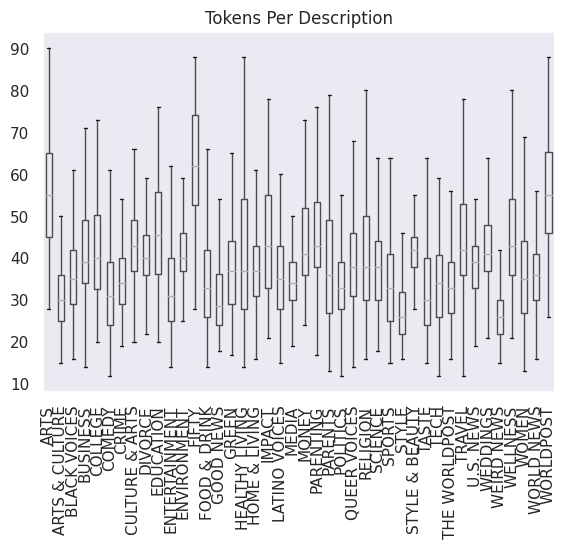

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
df.boxplot('Tokens Per Description', by='category', grid=False, showfliers=False)
plt.suptitle('')
plt.xlabel('')
plt.xticks(rotation=90)
plt.show()

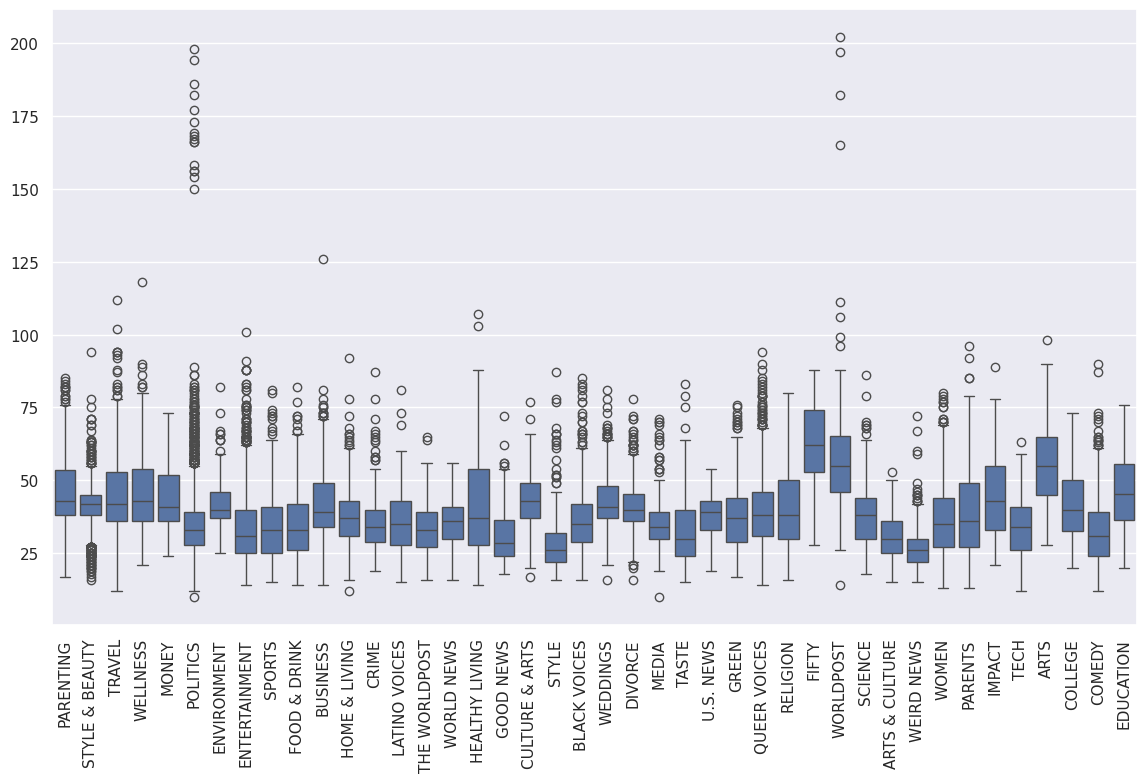

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='category', y='Tokens Per Description')

plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=90)
plt.show()

In [ ]:
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split

X = df.drop(columns=['category_id'])
y = df.category_id
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

len(X_train), len(X_test), len(X_valid)

(15184, 1898, 1899)

In [ ]:
train_dataset = Dataset.from_dict({'description': X_train.short_description.values.tolist(),
                                   'category': y_train.tolist()})
test_dataset = Dataset.from_dict({'description': X_test.short_description.values.tolist(),
                                  'category': y_test.tolist()})
validation_dataset = Dataset.from_dict({'description': X_valid.short_description.values.tolist(),
                                         'category': y_valid.tolist()})

dataset = DatasetDict({'train': train_dataset, 'test': test_dataset, 'validation': validation_dataset})

dataset

DatasetDict({
    train: Dataset({
        features: ['description', 'category'],
        num_rows: 15184
    })
    test: Dataset({
        features: ['description', 'category'],
        num_rows: 1898
    })
    validation: Dataset({
        features: ['description', 'category'],
        num_rows: 1899
    })
})

In [ ]:
def tokenize(batch):
    return tokenizer(batch['description'], padding=True, truncation=True, add_special_tokens=True)

dataset_encoded = dataset.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/15184 [00:00<?, ? examples/s]

Map:   0%|          | 0/1898 [00:00<?, ? examples/s]

Map:   0%|          | 0/1899 [00:00<?, ? examples/s]

In [ ]:
import torch
from transformers import AutoModel

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoModel.from_pretrained(model_ckpt).to(device)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
dataset_encoded.set_format('torch', columns=['input_ids', 'attention_mask', 'category'])

In [ ]:
len(df.category.unique())

42

In [ ]:
from transformers import AutoModelForSequenceClassification

num_labels = 42
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)

    return {"accuracy": acc, "f1": f1}

In [ ]:
dataset_encoded['train'] = dataset_encoded['train'].rename_column("category", "label")
dataset_encoded['test'] = dataset_encoded['test'].rename_column("category", "label")
dataset_encoded['validation'] = dataset_encoded['validation'].rename_column("category", "label")

In [ ]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(dataset_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-news-based-accuracy"
training_args = TrainingArguments(output_dir=model_name,
                                  overwrite_output_dir='True',
                                  num_train_epochs=5,
                                  learning_rate=3e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  eval_strategy='epoch',
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=False,
                                  log_level="error",
                                  load_best_model_at_end=True,
                                  save_strategy='epoch',
                                  save_total_limit=1,
                                  seed=42,
                                  metric_for_best_model='accuracy')

In [ ]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=dataset_encoded["train"],
                  eval_dataset=dataset_encoded["test"],
                  tokenizer=tokenizer)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,2.163200,1.591891,0.582192,0.506530
2,1.404000,1.385055,0.628030,0.589206
3,1.125500,1.322818,0.643836,0.614536
4,0.934600,1.318092,0.642255,0.629040
5,0.820000,1.298783,0.646997,0.632327


TrainOutput(global_step=1190, training_loss=1.2875190859081365, metrics={'train_runtime': 1219.4384, 'train_samples_per_second': 62.258, 'train_steps_per_second': 0.976, 'total_flos': 7727632698614400.0, 'train_loss': 1.2875190859081365, 'epoch': 5.0})

In [ ]:
eval = pd.DataFrame(trainer.evaluate(), index=['']).T

eval

,
eval_loss,1.298783
eval_accuracy,0.646997
eval_f1,0.632327
eval_runtime,8.147800
eval_samples_per_second,232.946000
eval_steps_per_second,3.682000
epoch,5.000000


In [ ]:
preds = trainer.predict(dataset_encoded['validation'])

compute_metrics(preds)

{'accuracy': 0.6735123749341759, 'f1': 0.6528862079476266}

Results are without stop words are better. Let's preprocess the whole dataset and fine-tune the final model. 